# Feature Selection - Filter Method

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [48]:
df = pd.read_csv("data/train.csv")

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df['Survived'].unique()

array([0, 1])

In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

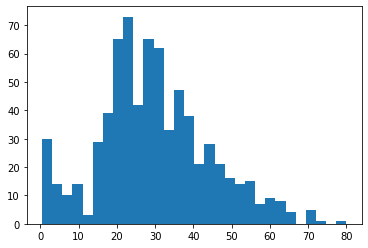

In [55]:
plt.hist(df["Age"], bins = 30)
plt.show()

In [56]:
people_survived = df[df['Survived'] == 1]
people_died = df[df['Survived'] == 0]

In [57]:
people_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [58]:
people_survived_mean_age = people_survived['Age'].mean()
people_died_mean_age = people_died['Age'].mean()
print(people_survived_mean_age, people_died_mean_age)

28.343689655172415 30.62617924528302


In [59]:
df['Age'].std() / np.sqrt(len(df))

0.48665597140859257

In [60]:
(28 - 30 ) / 0.48

-4.166666666666667

In [61]:
len(people_died)

549

### Applying T Test

In [67]:
alpha = 0.05

In [62]:
people_survived["Age"] = people_survived["Age"].fillna(people_survived_mean_age)
people_died["Age"] = people_died["Age"].fillna(people_died_mean_age)

<ipython-input-62-67a5474de671>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_survived["Age"] = people_survived["Age"].fillna(people_survived_mean_age)
<ipython-input-62-67a5474de671>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_died["Age"] = people_died["Age"].fillna(people_died_mean_age)


In [65]:
t_stat, p_val = stats.ttest_ind(people_survived['Age'].values, people_died['Age'].values)

In [69]:
print(abs(t_stat), p_val)

2.5545424967976222 0.010798379035665778


In [68]:
p_val < alpha

True

### Z Test

In [70]:
s1 = people_survived["Age"].std()
n1 = len(people_survived)

s2 = people_died["Age"].std()
n2 = len(people_died)


In [74]:
pooled_std = np.sqrt((s1 ** 2 / n1) + (s2 ** 2 / n2))
z_stat = (people_survived_mean_age - people_died_mean_age) / pooled_std

z_stat

In [76]:
p_val = (1 - stats.norm.cdf(abs(z_stat))) * 2

In [77]:
p_val

0.012564998835656205

### analyse fare and survival relation

In [80]:
t_stat, p_val = stats.ttest_ind(people_survived['Fare'], people_died['Fare'])

In [81]:
print(t_stat, p_val)

7.939191660871055 6.120189341924198e-15


In [82]:
p_val < alpha

True

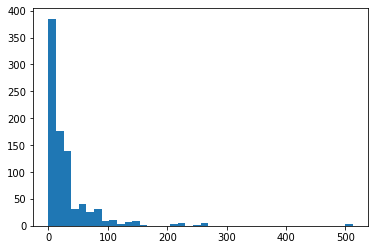

In [87]:
plt.hist(df['Fare'], bins = 40)
plt.show()

### Chi Squared Test

In [88]:
df['Sex'].isna().sum()

0

In [93]:
contengincy_matrix = pd.crosstab(df['Sex'], df['Survived'])

In [94]:
contengincy_matrix

Survived,0,1
Sex,,
female,81,233
male,468,109


In [95]:
chi_squared_stat, p_val, dof, exp = stats.chi2_contingency(contengincy_matrix)

In [97]:
exp

array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]])

In [98]:
print(chi_squared_stat, p_val, dof)

260.71702016732104 1.1973570627755645e-58 1


In [99]:
p_val < alpha

True

In [101]:
df["SeniorCitizen"] = df['Age'] > 60

In [103]:
df["SeniorCitizen"].unique()

array([False,  True])

In [104]:
contengincy_matrix = pd.crosstab(df["SeniorCitizen"], df['Survived'])

In [105]:
contengincy_matrix

Survived,0,1
SeniorCitizen,,
False,532,337
True,17,5


In [109]:
chi_squared_stat, p_val, dof, exp = stats.chi2_contingency(contengincy_matrix)

In [110]:
exp

array([[535.44444444, 333.55555556],
       [ 13.55555556,   8.44444444]])

In [111]:
print(chi_squared_stat, p_val, dof)

1.708436861764289 0.19118830535096237 1


In [112]:
p_val < alpha

False

p(survived) = p(survived | senior citizen)

p(survived) != p(survived | gender)

In [114]:

df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [117]:
df['Cabin'] = df['Cabin'].fillna(value = 'Z')

In [118]:
df.Cabin.isna().sum()

0

In [125]:
contengincy_matrix = pd.crosstab(df['Survived'], df["Cabin"])

In [131]:
chi_squared_stat, p_val, dof, exp = stats.chi2_contingency(contengincy_matrix)

In [132]:
print(chi_squared_stat, p_val, dof)

240.99672677470033 1.617698166309318e-06 147


In [133]:
p_val < alpha

True

In [134]:
contengincy_matrix

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,Z
Survived,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,1,...,0,1,2,1,0,1,0,2,1,481
1,0,0,1,0,1,1,0,1,1,0,...,1,0,0,2,3,0,2,2,0,206


In [136]:
exp < 5

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [137]:
df["Cabin"] = df["Cabin"].str[0]

In [138]:
df["Cabin"].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [139]:
contengincy_matrix = pd.crosstab(df['Survived'], df["Cabin"])

In [140]:
contengincy_matrix

Cabin,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [141]:
chi_squared_stat, p_val, dof, exp = stats.chi2_contingency(contengincy_matrix)

In [143]:
exp < 5

array([[False, False, False, False, False, False,  True,  True, False],
       [False, False, False, False, False,  True,  True,  True, False]])

In [145]:
df2 = df[df["Cabin"].isin(["A", "B", "C", "D", "E", "Z"])]

In [146]:
df2['Cabin'].unique()

array(['Z', 'C', 'E', 'D', 'A', 'B'], dtype=object)

In [228]:
df3 = df[df['SibSp'] < 5]
df3['SibSp'] = df['SibSp'] > 0
contengincy_matrix = pd.crosstab(df3['SibSp'], df3["Survived"])
chi_squared_stat, p_val, dof, exp = stats.chi2_contingency(contengincy_matrix)

<ipython-input-228-701521df51ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['SibSp'] = df['SibSp'] > 0


In [229]:
exp < 5

array([[False, False],
       [False, False]])

In [230]:
print(chi_squared_stat, p_val, dof)

15.241688641838756 9.459210535885008e-05 1


In [231]:
p_val < alpha

True

In [232]:
contengincy_matrix

Survived,0,1
SibSp,,
False,398,210
True,139,132
